In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
import matplotlib.pyplot as plt

In [8]:
from google.colab import files

In [9]:
uploaded = files.upload()

Saving train_safety_dataset_ready.csv to train_safety_dataset_ready.csv


In [10]:
train_safety_dataset_ready = list(uploaded.keys())[0]
df = pd.read_csv(train_safety_dataset_ready)

df.head()


,speed_kmh,curve_radius_m,lateral_accel,roll_angle_deg,yaw_rate_dps,gps_accuracy_m,safe_speed_kmh,overspeed_margin_kmh,risk
0,67.454012,651.089728,1.451153,-0.007914,2.560394,1.008040,63.791150,3.662862,0
1,125.071431,762.809923,1.298420,5.921923,0.662102,0.834146,69.047534,56.023896,1
2,103.199394,1296.366350,0.710577,1.504003,1.226306,3.823056,90.012720,13.186675,0
3,89.865848,576.006141,2.327250,-10.000738,2.328217,5.813640,60.000320,29.865529,2
4,45.601864,1317.509559,1.837341,-7.546074,1.697671,3.264967,90.743786,-45.141922,0


In [11]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isna().sum())
print("\nClass counts:\n", df["risk"].value_counts())


Shape: (39, 9)
Columns: ['speed_kmh', 'curve_radius_m', 'lateral_accel', 'roll_angle_deg', 'yaw_rate_dps', 'gps_accuracy_m', 'safe_speed_kmh', 'overspeed_margin_kmh', 'risk']

Missing values per column:
 speed_kmh               0
curve_radius_m          0
lateral_accel           0
roll_angle_deg          0
yaw_rate_dps            0
gps_accuracy_m          0
safe_speed_kmh          0
overspeed_margin_kmh    0
risk                    0
dtype: int64

Class counts:
 risk
0    25
2    11
1     3
Name: count, dtype: int64


In [12]:
feature_cols = [
    "speed_kmh",
    "curve_radius_m",
    "lateral_accel",
    "roll_angle_deg",
    "yaw_rate_dps",
    "gps_accuracy_m",
    "safe_speed_kmh",
    "overspeed_margin_kmh"
]

X = df[feature_cols]
y = df["risk"]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (31, 8)
Test size: (8, 8)


In [14]:
model = DecisionTreeClassifier(
    max_depth=5,      # keep small (good for ESP32 later)
    random_state=42
)

model.fit(X_train, y_train)
print("✅ Model trained!")


✅ Model trained!


In [15]:
y_pred = model.predict(X_test)
y_pred[:10]


array([0, 0, 0, 2, 0, 2, 0, 0])

In [16]:
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)

print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.75

✅ Classification Report:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.65      0.75      0.69         8



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("✅ Confusion Matrix:\n", cm)


✅ Confusion Matrix:
 [[5 0 0]
 [0 0 1]
 [1 0 1]]


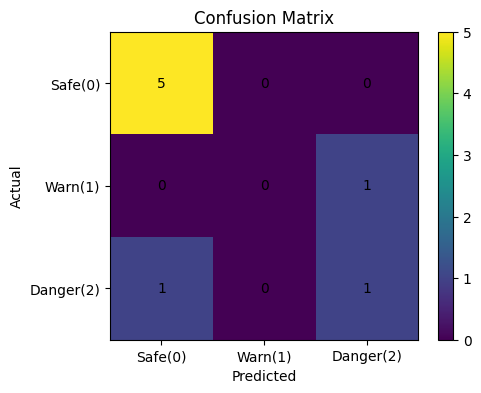

In [18]:
plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

plt.xticks([0,1,2], ["Safe(0)","Warn(1)","Danger(2)"])
plt.yticks([0,1,2], ["Safe(0)","Warn(1)","Danger(2)"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [19]:
import joblib
joblib.dump(model, "decision_tree_risk_model.pkl")
print("✅ Saved model: decision_tree_risk_model.pkl")


✅ Saved model: decision_tree_risk_model.pkl


In [20]:
from google.colab import files
files.download("decision_tree_risk_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>